<a href="https://colab.research.google.com/github/Praneeth-9904/ML-Labs-colab/blob/main/LAB-08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

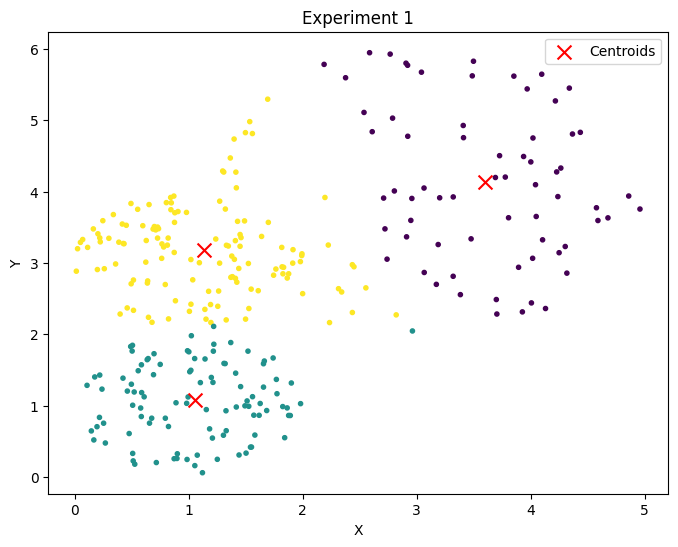

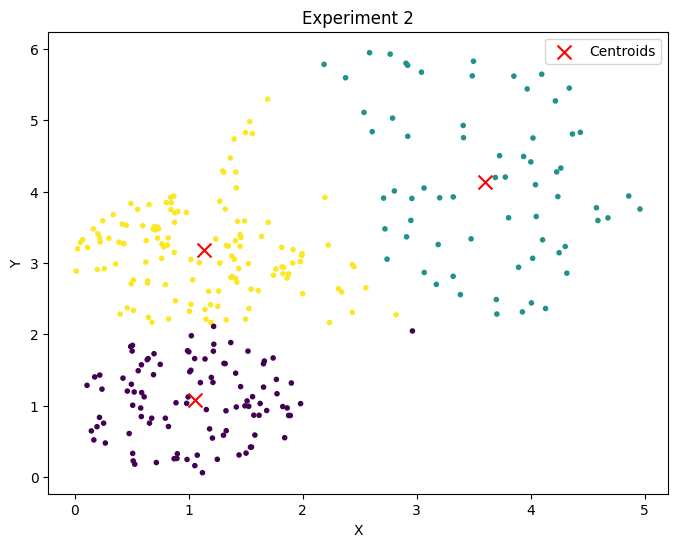

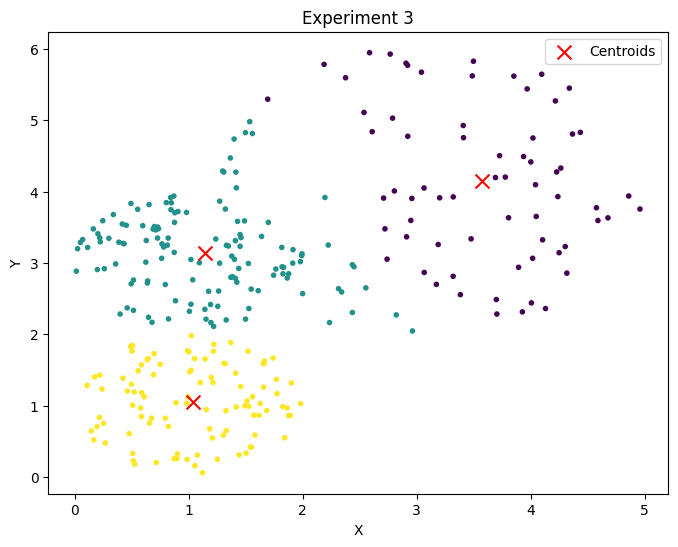

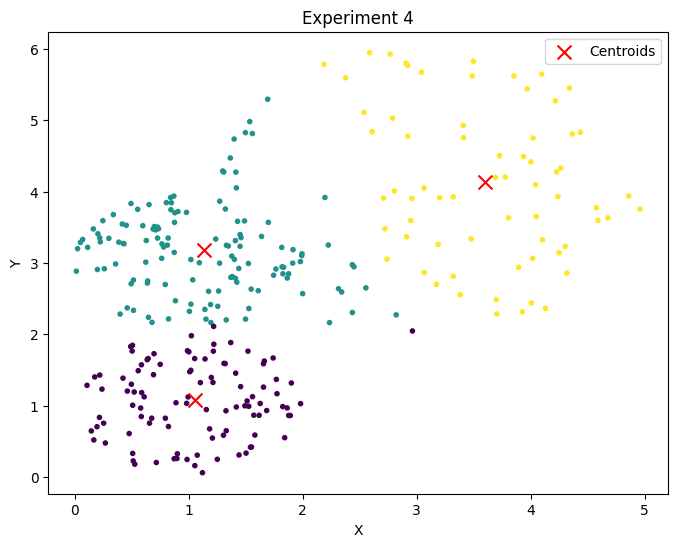

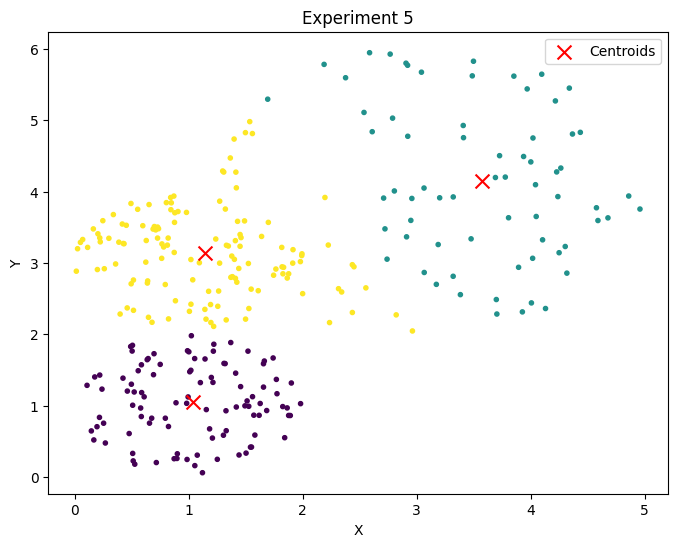

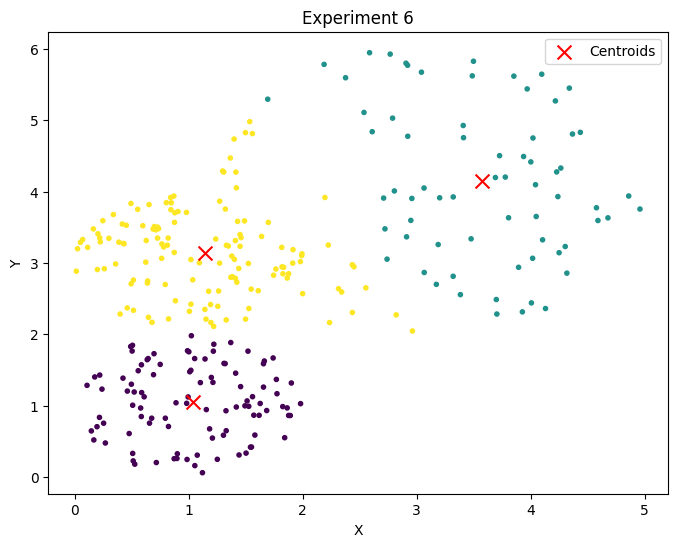

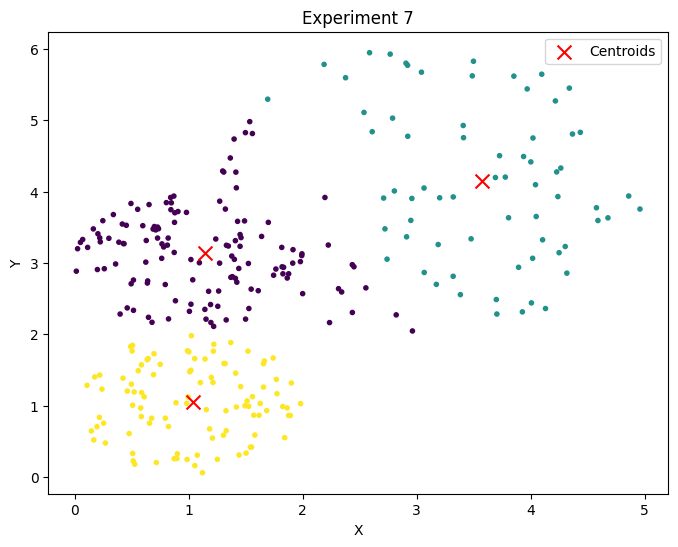

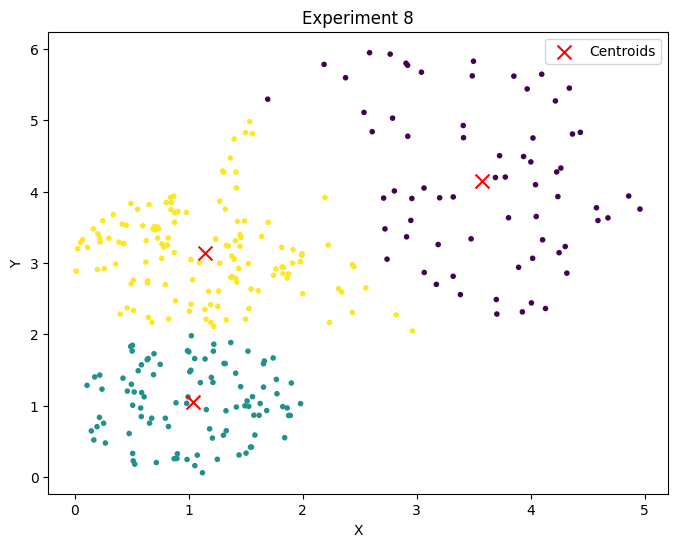

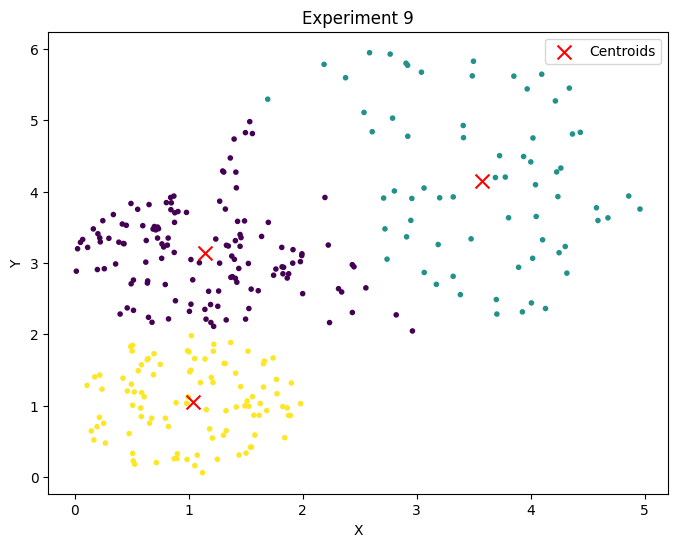

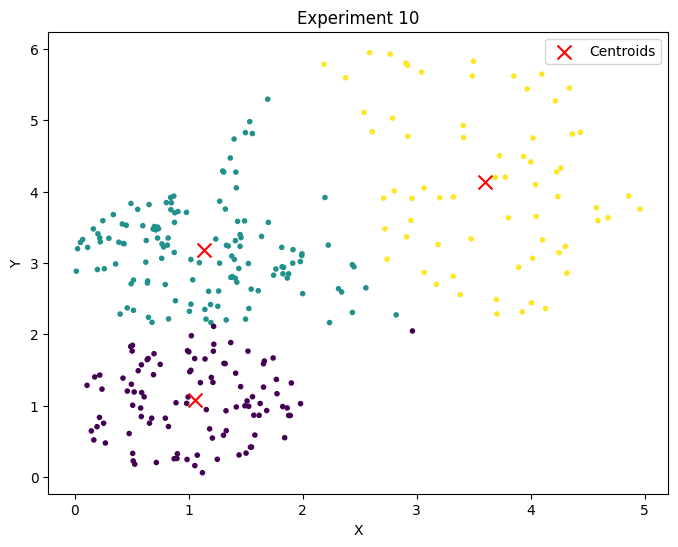

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_points(center, radius, num_points):
    points = []
    while len(points) < num_points:
        x, y = np.random.uniform(-radius, radius, 2) + center
        if np.linalg.norm([x - center[0], y - center[1]]) <= radius:
            points.append([x, y])
    return np.array(points)

def k_means(X, k, max_iters=100, tol=1e-4):
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]

    for i in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])

        if np.all(np.abs(new_centroids - centroids) < tol):
            break

        centroids = new_centroids

    return centroids, labels

def plot_clusters(X, labels, centroids, title="Clusters"):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='.')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label="Centroids")
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.show()

def run_experiment():
    points_1 = generate_points((1, 1), 1, 100)
    points_2 = generate_points((3, 4), 2, 100)
    points_3 = generate_points((1, 3), 1, 100)

    X = np.vstack([points_1, points_2, points_3])

    for experiment in range(10):
        centroids, labels = k_means(X, 3)
        plot_clusters(X, labels, centroids, title=f"Experiment {experiment + 1}")

run_experiment()